<a href="https://colab.research.google.com/github/exception420/files/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis on Netflix Movies and TV Shows

Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualisations and graphs using matplotlib and seaborn.

## Package Install and Import
First, we will install and import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the Dataset

Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data look like.

In [2]:
!wget -q https://raw.githubusercontent.com/exception420/files/main/netflix_titles.csv



In [3]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


After a quick glimpse at the dataset, it looks like a typical movies/shows dataset without user ratings. We can also see that there are NaN values in some columns.

## Data Preparation and Cleaning

In [4]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


There are 7787 entries and 12 columns to work with for EDA. Right off the bat, there are a few columns that contain null values ('director', 'cast', 'country', 'data_added', 'rating')

In [5]:
netflix_titles_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Handling Null Values
We can see that for each of the columns, there are a lot different unique values for some of them. 

In [6]:
netflix_titles_df.isnull().values.any()

True

In [7]:
netflix_titles_df.isnull().sum().sum()

3631

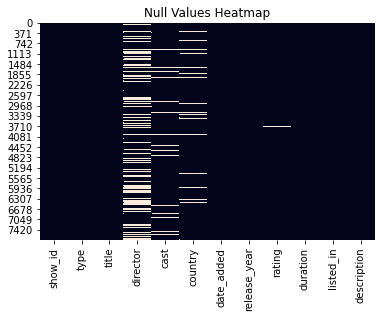

In [8]:
sns.heatmap(netflix_titles_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [9]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 3631 null values across the entire dataset with 2389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added' and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modelling.

In [10]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [11]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with missing data. However, this wouldn't be benificial to our EDA since there is loss of information. Since 'director', 'cast' and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop the from the dataset. After, we can see that there are no more null values in the dataset.

## Splitting the Dataset
Since the dataset can either contain movies or shows, it would be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows. So we will create two new datasets. One for movies and the other one for shows.

In [12]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [13]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


## Data Preparation
In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert values in these columns into integers for both the movies and shows datasets.

In [14]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min', '').astype(int)
netflix_shows_df.rename(columns={'duration': 'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons': {'1 Season': '1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons', '').astype(int)

# Exploratory Analysis and Visualizations
First we will begin analysis on the entire Netflix dataset consisting of bothe movies and shows. Revisting the data, let us see how it looked like again.

In [15]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Netflix Film Types: Movie or TV Show
It would be interesting to see the comparison between the total number of movies and shows in the dataset just to get an idea of which one is the majority.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


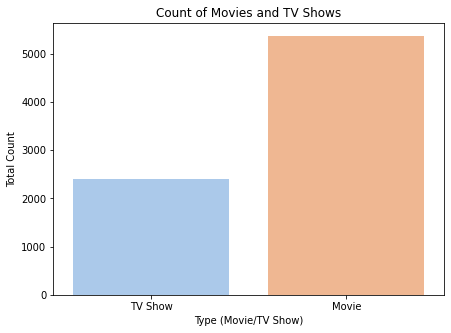

In [16]:
plt.figure(figsize=(7,5))
g = sns.countplot(netflix_titles_df.type, palette='pastel')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Total Count')
plt.show()

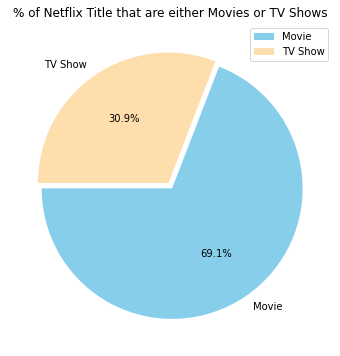

In [17]:
plt.figure(figsize=(12,6))
plt.title('% of Netflix Title that are either Movies or TV Shows')
g = plt.pie(netflix_titles_df.type.value_counts(), explode=(0.025, 0.025), labels=netflix_titles_df.type.value_counts().index, colors=['skyblue','navajowhite'], autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

So there are roughly 5000+ movies and almost 2000+ TV Shows, movies being the clear majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV Show episodes vs Movies, I am sure that TV Shows would come out as the majority. However, in terms of title, there are far more movie titles (69.1%) than TV Show titles (30.9%).

## Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


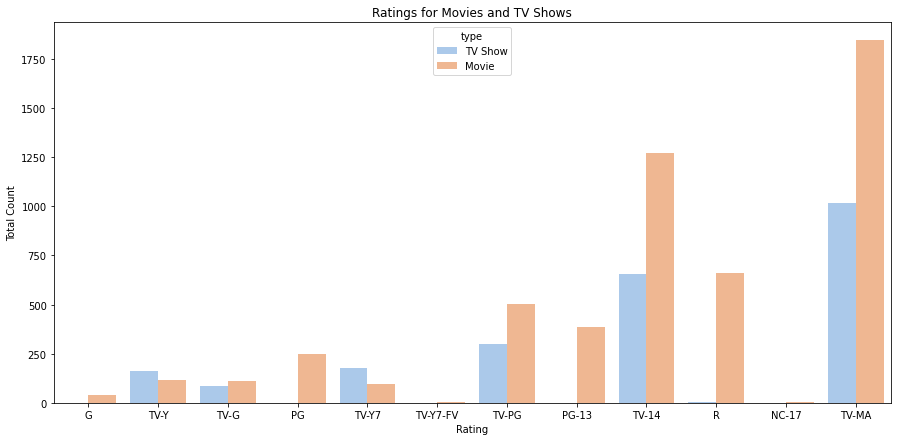

In [18]:
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_titles_df.rating, hue=netflix_titles_df.type, order=order, palette='pastel')
plt.title('Ratings for Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


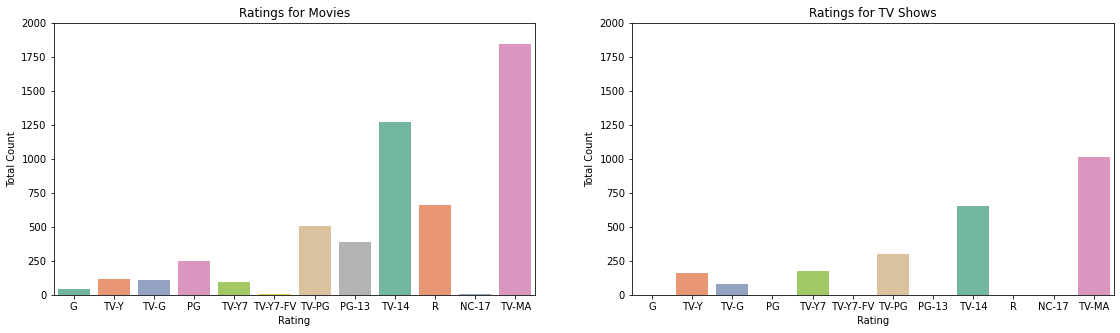

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))
g1 = sns.countplot(netflix_movies_df.rating, order=order, palette='Set2', ax=ax[0])
g1.set(yticks=np.arange(0, 2200, 250))
g1.set_title('Ratings for Movies')
g1.set_xlabel('Rating')
g1.set_ylabel('Total Count')
g2 = sns.countplot(netflix_shows_df.rating, order=order, palette='Set2', ax=ax[1])
g2.set(yticks=np.arange(0, 2200, 250))
g2.set_title('Ratings for TV Shows')
g2.set_xlabel('Rating')
g2.set_ylabel('Total Count')
fig.show()

Overall, there is much more content for a  mature audience. For the mature audience, there are more movies than there are TV Shows. However, for the younger audience ( under the age of 17 ), it is the opposite, there are slightly more TV Shows than there are movies.

In [20]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

#Content added each year
Now we will take a look at the amount of content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column that shows the year of the date from the 'date_added' column as shown above.

In [21]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added': 'count'})
netflix_year = netflix_year[netflix_year.year != 2021]
netflix_year


,year,count
0,2019,2153
1,2020,2009
2,2018,1684
3,2017,1222
4,2016,440
6,2015,88
7,2014,25
8,2011,13
9,2013,11
10,2012,3


In [22]:
netflix_year2 = netflix_titles_df[['type', 'year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added': 'count'})
movie_year = movie_year[movie_year.year != 2021]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added': 'count'})
show_year = show_year[show_year.year != 2021]


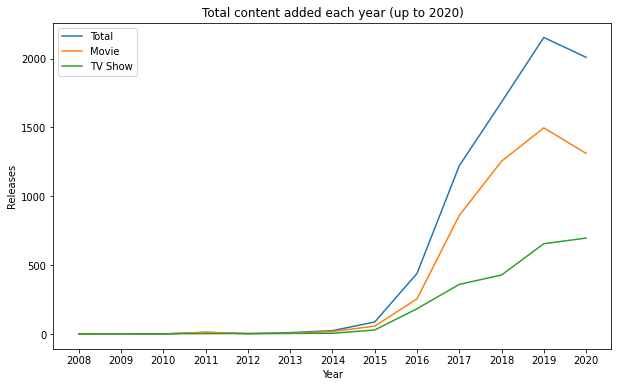

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title('Total content added each year (up to 2020)')
plt.legend(['Total', 'Movie', 'TV Show'])
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()

Based on the above timeline, we can see that the popular streaming started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2021 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows, the reason clearly being the repititve nature of TV Shows. 

#### We see a decline in number of title released in 2020, the reason being delays due to COVID-19 outbreak.

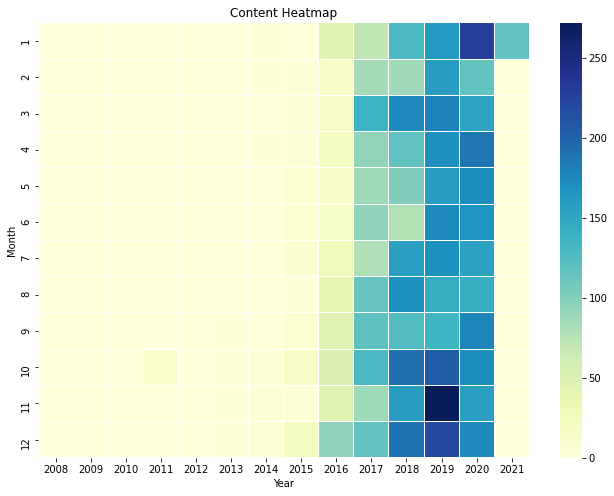

In [24]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11, 8))
sns.heatmap(month_year_df, linewidths=0.025, cmap='YlGnBu')
plt.title('Content Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

In the above heatmap, we can see that around 2014 is when Netflix began to increaase thier content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2021, the data stops in January since that is the latest month available in the dataset.

## Netflix Film Duration


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Duration (seasons)')

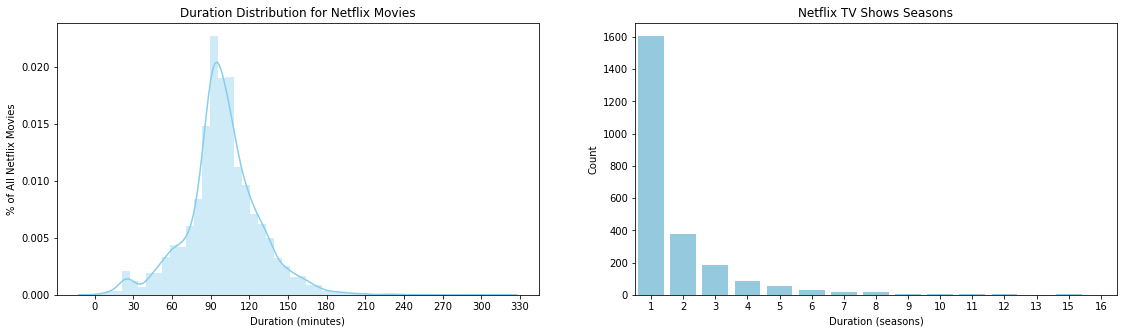

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))
g1 = sns.distplot(netflix_movies_df.duration, color='skyblue', ax=ax[0])
g1.set_xticks(np.arange(0, 360, 30))
g1.set_title('Duration Distribution for Netflix Movies')
g1.set_ylabel('% of All Netflix Movies')
g1.set_xlabel('Duration (minutes)')
g2 = sns.countplot(netflix_shows_df.seasons, color='skyblue', ax=ax[1])
g2.set_title('Netflix TV Shows Seasons')
g2.set_ylabel('Count')
g2.set_xlabel('Duration (seasons)')

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes, which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

## Countries with the most content available

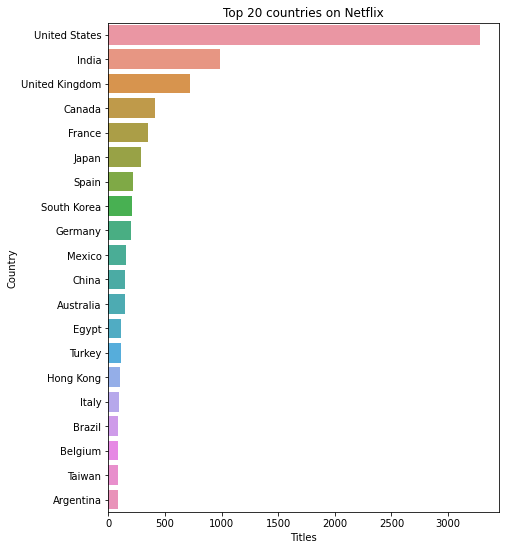

In [26]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7, 9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countires as shown in the original dateset. Therefore, we need to separate all countries within a film before we can analyze the data. After separating countries and removing titles with no countries available, we can plot a Top 20 list to see whcih countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India at second position is a genuine surprise. UK and Canada follow India. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the bannign of certain applications whcih isn't uncommon between the United States and China.

## Popular Genres

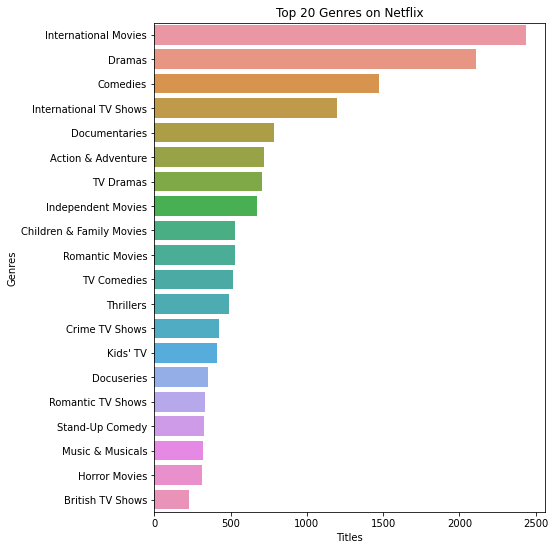

In [27]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ',expand=True ).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(7, 9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies take the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't acutally in the United States, but the majority of viewers are actually international subscribers.

# QNA

## Who are the top 10 directors on Netflix with the most releases?

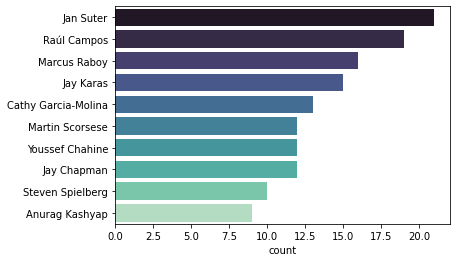

In [28]:
filtered_directors = netflix_titles_df[netflix_titles_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order = filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

As stated previously regardingn the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

## Who are the top 10 actors on Netflix based on number of titles?

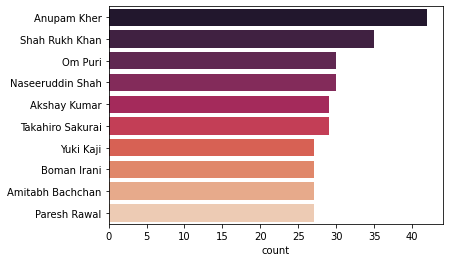

In [29]:
filtered_cast = netflix_titles_df[netflix_titles_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order = filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

In this list, we can see that the most popular actors on Netflix based on the number of titles are all international as well. This reinforces the sentiment that the majority of Netflix subscribers are international.

## How does the timeline look like for the addition of international movies compared to international TV shows?

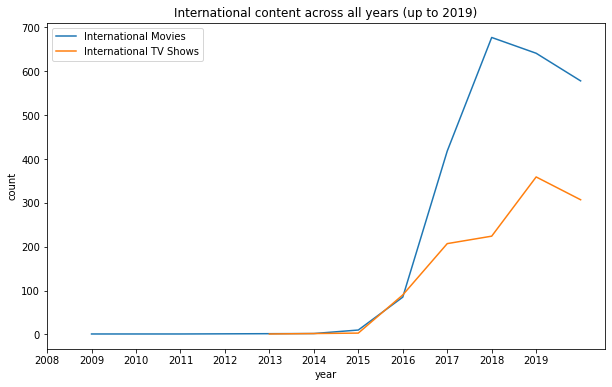

In [30]:
international_movies = netflix_titles_df[ netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2021]

international_shows = netflix_titles_df[ netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year', 'year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2021]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

Based on the timeline, we can see that there are far more international movie releases than there are international TV show releases. Howerver, near 2018, the growth of international movies started to decline while international TV shows constantly showed significant growth in the past few years.

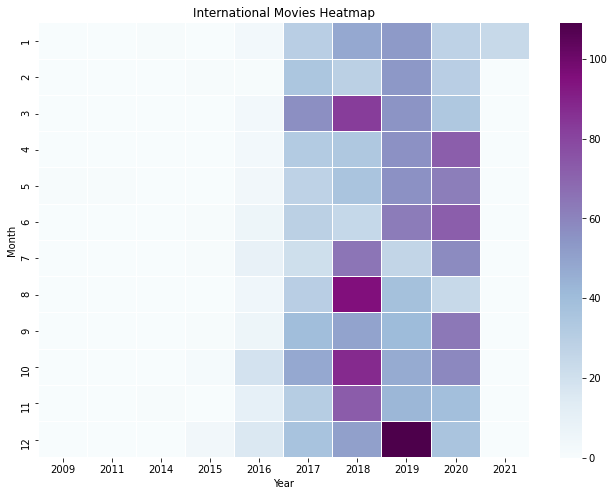

In [31]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap='BuPu')
plt.title('International Movies Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.



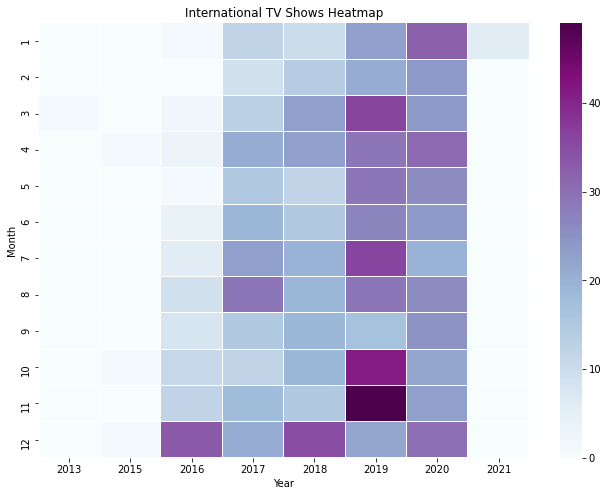

In [32]:
intshow_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intshow_month_year_df, linewidths=0.025, cmap='BuPu')
plt.title('International TV Shows Heatmap')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

In the above heatmap, we can see that the majority of international TV shows were added throughout the year 2019.

# Inferences and Conclusion
---
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix has about 158 million subscribers worldwide, with 60 million from the US alone. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

# References
---
- Link to the [dataset](https://www.kaggle.com/shivamb/netflix-shows)
- Link to Business Insider [article](https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10?IR=T) on Netflix's growth.